# Classification with a Tabular Vector Borne Disease Dataset

Dependencies

In [1]:
import pandas as pd

import torch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns


DATA_PATH = "../data/playground-series-s3e13/"

## Data

In [2]:
df_train = pd.read_csv(DATA_PATH + "train.csv")
df_test = pd.read_csv(DATA_PATH + "test.csv")

df_train.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


### EDA

In [3]:
df_train.shape

(707, 66)

In [4]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('float64'),
       <StringDtype(storage='python', na_value=nan)>], dtype=object)

In [5]:
df_train.drop(columns=['id', 'prognosis']).min().unique()

array([0.])

In [6]:
df_test.drop(columns=['id']).min().unique()

array([0.])

In [7]:
df_train.drop(columns=['id', 'prognosis']).max().unique()

array([1.])

In [8]:
df_test.drop(columns=['id']).max().unique()

array([1.])

In [9]:
((df_train.drop(columns=['id', 'prognosis']) > 0.) & (df_train.drop(columns=['id', 'prognosis']) < 1.)).sum().sum()

np.int64(0)

In [10]:
df_train['prognosis'].value_counts()

prognosis
West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='prognosis'>

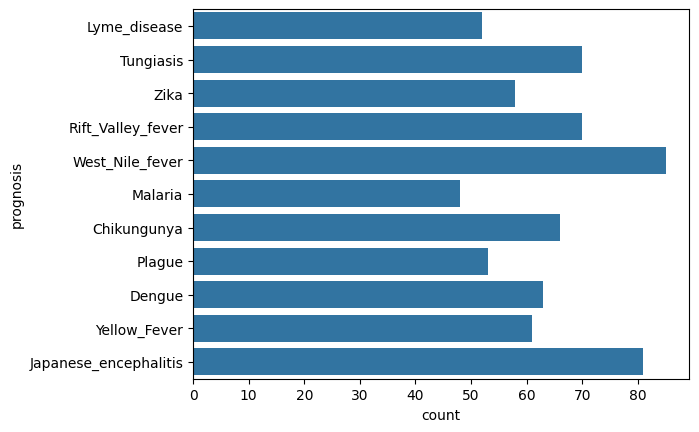

In [11]:
sns.countplot(df_train['prognosis'].astype(str))

### Dataset preparing

In [12]:
drop_cols = ['id']
target = 'prognosis'
features = df_train.drop(columns=drop_cols + [target], errors='ignore').columns

In [21]:
le = LabelEncoder()

X = df_train[features].to_numpy()
y = le.fit_transform(df_train[target])
X_test = df_test[features].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [19]:
X_train[0]

array([ 0.9929527 , -0.9041464 ,  1.08415156,  1.02434143, -1.03600858,
        1.10601557, -0.88874823, -0.976237  ,  1.24963763,  1.24224211,
       -0.7860337 ,  1.29538809, -0.75110538, -0.71688118, -0.78133115,
        1.23856779,  1.33546418,  1.28372118,  1.4494403 , -0.69215569,
        1.40823377,  1.41721933,  1.31119441,  1.19563927, -0.80023198,
        1.27603009,  1.40377642,  1.3520355 , -0.81457315, -0.75110538,
        1.49770467,  1.28759261,  1.10918164,  1.10601557,  1.2132716 ,
       -0.90673312,  1.03894743,  1.03600858, -0.88366081, -0.77430453,
        1.63193518, -0.5233296 , -0.5626487 , -0.54083692, -0.53646621,
       -0.58225008, -0.52990292, -0.54302099, -0.521136  , -0.38918607,
       -0.49247412, -0.46344   , -0.50353361, -0.45440581, -0.41763453,
       -0.27882594, -0.32886239, -0.29329423, -0.30452537, -0.42693588,
       -0.41060327, -0.3987686 , -0.1833732 , -0.17921157])

In [20]:
y_train[:10]

array([ 3,  8,  2,  3, 10,  4,  1,  4,  1,  4])

In [ ]:
X_train_t = torch.FloatTensor(X_train)
X_val_t = torch.FloatTensor(X_val)
X_test_t = torch.FloatTensor(X_test)

y_train_t = torch.LongTensor(y_train)
y_val_t = torch.LongTensor(y_val)